In [1]:
# Bibliotecas
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Custom Libraries
from data import get_data, clean_data

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# load model 
import joblib

from prettytable import PrettyTable

In [2]:
data = clean_data(get_data())

Removed 0.01888276947285602% contradictory rows and 8.300884533772024% duplicates


In [3]:
train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  

train_y = train_df['target']
train_x = train_df.drop(columns=['target'])

val_y = val_df['target']
val_x = val_df.drop(columns=['target'])

test_y = test_df['target']
test_x = test_df.drop(columns=['target'])

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)

In [4]:
RESULTS = {}
MODELS = {}
def give_metrics(y_true, y_pred):
    result = {}
    result['Precision'] = precision_score(y_true, y_pred) * 100
    result['Recall'] = recall_score(y_true, y_pred) * 100
    result['F1 Score'] = f1_score(y_true, y_pred) * 100
    result['Accuracy'] = accuracy_score(y_true, y_pred) * 100
    return result

def metrics(model, model_name, train_x = train_x, train_y=train_y, val_x = val_x, val_y = val_y, test_x = test_x, test_y = test_y, treshold=0.5):
    result = {}
    result['Train'] = give_metrics(train_y, model.predict(train_x) > treshold)
    result['Validation'] = give_metrics(val_y, model.predict(val_x) > treshold)
    result['Test'] = give_metrics(test_y, model.predict(test_x) > treshold)
    RESULTS[model_name] = result
    MODELS[model_name] = model


In [5]:
RESULTS = {}
MODELS = {}

In [6]:
model = LogisticRegression()
model.fit(train_x, train_y)
metrics(model, 'Logistic Regression')

In [7]:
model= DecisionTreeClassifier()
model.fit(train_x, train_y)
metrics(model, 'Decision Tree')

In [8]:
model = DecisionTreeClassifier(max_depth=9)
model.fit(train_x, train_y)
metrics(model, 'Decision Tree Max Depth 9')

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_x, train_y)
metrics(model, 'Random Forest')

In [10]:
model = joblib.load('models/svm_model.pkl')
metrics(model, 'SVM')

In [11]:
model = SVC()
model.fit(train_x, train_y)
metrics(model)

Train
Precision:  73.95993836671802 %
Recall:  4.8004800480048 %
F1 Score:  9.015777610818933 %
Accuracy:  98.3203912614576 %
Val
Precision:  71.875 %
Recall:  4.959950708564387 %
F1 Score:  9.279538904899136 %
Accuracy:  98.36269354595433 %
Test
Precision:  73.38403041825094 %
Recall:  5.8626974483596594 %
F1 Score:  10.857946554149086 %
Accuracy:  98.35177980735223 %


In [13]:
# save svm model
import joblib
joblib.dump(model, 'models/svm_model.pkl')

['models/svm_model.pkl']

In [11]:
model = MultinomialNB()
model.fit(train_x, train_y)
metrics(model, 'Naive Bayes')

In [12]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
metrics(model, "Kneighbors")

In [13]:
model = AdaBoostClassifier()
model.fit(train_x, train_y)
metrics(model, "Adaboost")

/home/qwas/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [14]:
model = BaggingClassifier()
model.fit(train_x, train_y)
metrics(model, "Bagging")

In [15]:
model = ExtraTreesClassifier()
model.fit(train_x, train_y)
metrics(model, "ExtraTrees")

In [16]:
model = GradientBoostingClassifier()
model.fit(train_x, train_y)
metrics(model, "GradientBoosting")

In [17]:
model = XGBClassifier()
model.fit(train_x, train_y)
metrics(model, "XGB")

In [28]:
table = PrettyTable()
table.field_names = ["Model", "tr_precision", "tr_recall", "tr_f1", "val_precision", "val_recall", "val_f1", "te_precision", "te_recall", "te_f1"]
for model in RESULTS.keys():
    table.add_row([model, 
                   RESULTS[model]['Train']['Precision'], RESULTS[model]['Train']['Recall'], RESULTS[model]['Train']['F1 Score'], 
                   RESULTS[model]['Validation']['Precision'], RESULTS[model]['Validation']['Recall'], RESULTS[model]['Validation']['F1 Score'], 
                   RESULTS[model]['Test']['Precision'], RESULTS[model]['Test']['Recall'], RESULTS[model]['Test']['F1 Score']])    

In [31]:
table.sortby = "te_f1"
print(table)

+---------------------------+--------------------+--------------------+---------------------+-------------------+---------------------+---------------------+--------------------+---------------------+--------------------+
|           Model           |    tr_precision    |     tr_recall      |        tr_f1        |   val_precision   |      val_recall     |        val_f1       |    te_precision    |      te_recall      |       te_f1        |
+---------------------------+--------------------+--------------------+---------------------+-------------------+---------------------+---------------------+--------------------+---------------------+--------------------+
|        Naive Bayes        |  9.70873786407767  |  0.2000200020002   | 0.39196472317491426 | 10.44776119402985 | 0.21565003080714723 | 0.42257772411711436 | 8.333333333333332  | 0.18226002430133656 | 0.356718192627824  |
|    Logistic Regression    | 26.865671641791046 | 0.7200720072007201 |  1.402551865199182  | 33.33333333333333 

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [60]:
class MegaInator(nn.Module):
    def __init__(self, input_size):
        super(MegaInator, self).__init__()
        
        self.model = nn.Sequential(
            # First block
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Second block
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Third block
            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            # Fourth block
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            # Fifth block
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Sixth block
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Output layer
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
        # Initialize weights using He initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
        
    def forward(self, x):
        return self.model(x)
    
    def self_destruct(self):
        print("CURSE YOU, PERRY THE PLATYPUS!")
        for param in self.parameters():
            param.data.zero_()
        return "💥 MEGA KABOOM! 💥"

In [44]:
X_train = torch.FloatTensor(train_x)
y_train = torch.FloatTensor(train_y.values).reshape(-1, 1)
X_val = torch.FloatTensor(val_x)
y_val = torch.FloatTensor(val_y.values).reshape(-1, 1)
X_test = torch.FloatTensor(test_x)
y_test = torch.FloatTensor(test_y.values).reshape(-1, 1)

In [61]:
pos_weight = torch.tensor([(len(train_y) - train_y.sum()) / train_y.sum()])
    
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    
model = MegaInator(input_size=train_x.shape[1])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', 
                                                   factor=0.5, patience=5, verbose=True)

/home/qwas/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [62]:
history = {
        'train_loss': [],
        'val_f1': [],
        'best_f1': 0.0
    }
    
patience = 10
counter = 0
best_model = None

In [63]:
epochs = 100
    
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        epoch_loss += loss.item()
    
    model.eval()
    with torch.no_grad():
        val_preds = (model(X_val) >= 0.5).float()
        val_f1 = f1_score(y_val.numpy(), val_preds.numpy())
        
        scheduler.step(val_f1)
        
        history['train_loss'].append(epoch_loss / len(train_loader))
        history['val_f1'].append(val_f1)
        
        #if val_f1 > history['best_f1']:
        #    history['best_f1'] = val_f1
        #    best_model = model.state_dict().copy()
        #    counter = 0
        #else:
        #    counter += 1
        #    if counter >= patience:
        #        print("CURSE YOU, EARLY STOPPING!")
        #        break
        
        if (epoch + 1) % 10 == 0:
            print(f"BEHOLD! Epoch {epoch+1}/{epochs}")
            print(f"Training Loss: {epoch_loss/len(train_loader):.4f}")
            print(f"Validation F1: {val_f1:.4f}")
    
    #model.load_state_dict(best_model)
    model.eval()
    with torch.no_grad():
        test_preds = (model(X_test) >= 0.5).float()
        test_f1 = f1_score(y_test.numpy(), test_preds.numpy())

: 


BEHOLD! The Final-Test-F1-Score-Inator: 0.5821


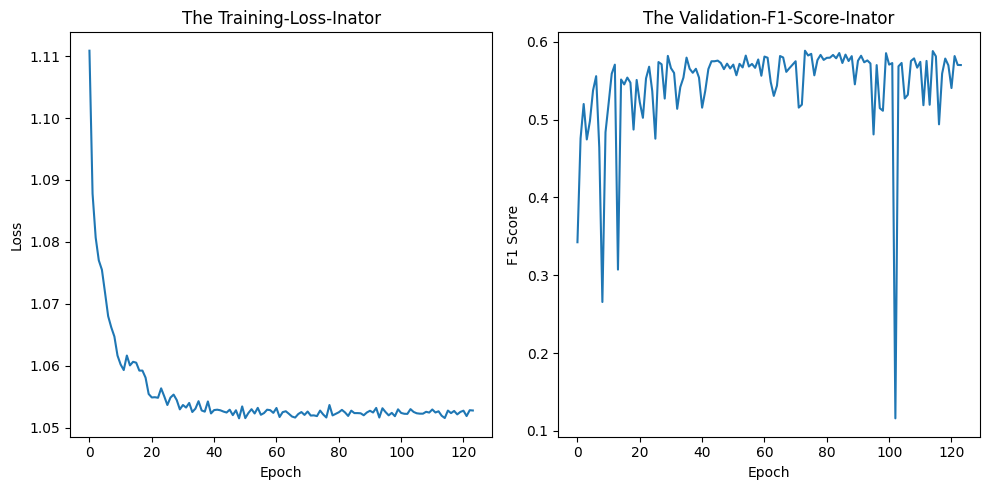

In [55]:
print(f"\nBEHOLD! The Final-Test-F1-Score-Inator: {test_f1:.4f}")
    
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'])
plt.title('The Training-Loss-Inator')
plt.xlabel('Epoch')
plt.ylabel('Loss')
    
plt.subplot(1, 2, 2)
plt.plot(history['val_f1'])
plt.title('The Validation-F1-Score-Inator')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.tight_layout()